In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# A1

In [2]:
population = pd.DataFrame(pd.read_csv("Population.csv"))
population.head()

,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1800,3280000,410000,2500000,2650,1570000,37000,534000,413000,351000,...,12300000,6800000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
1,1801,3280000,412000,2510000,2650,1570000,37000,534000,413000,350000,...,12500000,6930000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
2,1802,3280000,413000,2520000,2650,1570000,37000,534000,413000,349000,...,12600000,7070000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
3,1803,3280000,414000,2530000,2650,1570000,37000,534000,413000,348000,...,12800000,7200000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
4,1804,3280000,416000,2540000,2650,1570000,37000,534000,413000,348000,...,13000000,7340000,55000,1920000,27800,718000,6550000,2590000,747000,1090000


In [3]:
#1. In Python plot the population growth of Australia, China and United States over time.

Text(0,0.5,'Population')

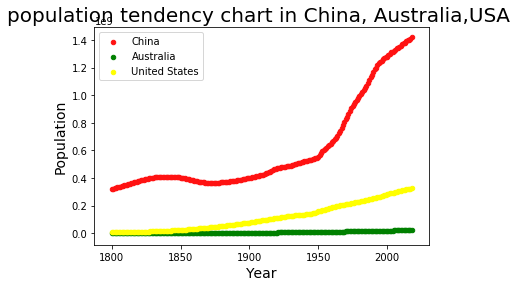

In [4]:
plt.scatter(population['Year'],population['China'],s=20, c="#ff1212", marker='o'),
plt.scatter(population['Year'],population['Australia'],s=20, c="green", marker='o'),
plt.scatter(population['Year'],population['United States'],s=20, c="yellow", marker='o'),
plt.legend()
plt.title("population tendency chart in China, Australia,USA ",fontsize=20)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Population",fontsize=14)

In [5]:
#2. Fit a linear regression using Python to the Chinese population data and plot the linear fit.
# 2.1 Does the linear fit look good?
# 2.2 Use the linear fit to predict the resident population in China in 2020 and 2100.
# 2.3 Instead of fitting the linear regression to all of the data, try fitting it to just the most recent data points (say from 1960 onwards). How is the fit? 
#Which model would give better predictions of future population in China do you think?

In [6]:
#2.1 Fit a linear regression using Python to the Chinese population data and plot the linear fit.
from scipy.stats import linregress
x = population['Year']
y = population['China']
slope, intercept, r_value,p_value, std_err = linregress(x,y)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: 4411204.542598    intercept: -7814934677.299574


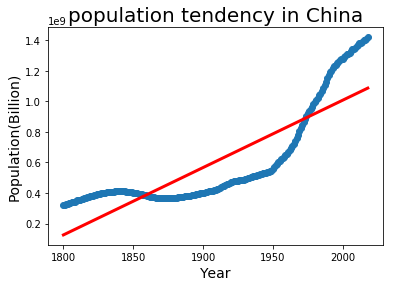

In [7]:
plt.plot(x, y, 'o', label='original data'),
plt.title("population tendency in China",fontsize=20)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Population(Billion)",fontsize=14)
#plt.plot(x, intercept + slope*x, 'r', label='fitted line')
line = [slope*xi + intercept for xi in x]
plt.plot(x,line,'r-', linewidth=3)

In [8]:
#2.2 Use the linear fit to predict the resident population in China in 2020 and 2100.

from the linear fit above, I get the slope is: 4411204.542598  intercept: -7814934677.299574

In [9]:
p2020 = slope*2020 +intercept 
p2020

1095698498.7489567

In [10]:
p2100 = slope*2100 +intercept 
p2100

1448594862.1568203

prediction: the resident population in China in 2020 will probablly at 1095698498.7489567
            the resident population in China in 2100 will probablly at 1448594862.1568203

In [11]:
#2.3  
#Which model would give better predictions of future population in China do you think?   这题还没做
filt = (population.Year >= 1960)
population_filt = population[filt]

In [12]:
population_filt.loc[160:,['China']].head()

,China
160,658000000
161,668000000
162,680000000
163,692000000
164,706000000


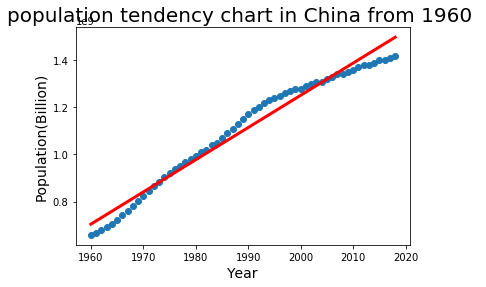

In [13]:
x1 = population_filt['Year']
y1 = population_filt['China']
slope, intercept, r_value, p_value, std_err = linregress(x1,y1)
plt.plot(x1, y1, 'o', label='original data'),
plt.title("population tendency chart in China from 1960 ",fontsize=20)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Population(Billion)",fontsize=14)
#plt.plot(x, intercept + slope*x, 'r', label='fitted line')
line = [slope*xi + intercept for xi in x1]
plt.plot(x1,line,'r-', linewidth=3)

# A2

In [14]:
#1. Use Python to plot the CO2 emissions (tonnes per person) for Australia, China and United States over time.
#How do you compare the trend in CO2 emissions for these three countries over the time period? 
#Are these countries having similar growth trend? 
#What are the maximum values for CO2 emissions (tonnes per person) for Australia, China and United States respectively?

In [15]:
#How do you compare the trend in CO2 emissions for these three countries over the time period? Are these countries having similar growth trend?

In [16]:
co2_emission = pd.DataFrame(pd.read_csv('co2_emissions_tonnes_per_person.csv'))
co2_emission.rename(columns ={'country':""},inplace=True)
co2_emission.set_index([""],inplace=True)

In [17]:
co2 = co2_emission.transpose()
co2 = co2.reset_index()

In [18]:
co2.rename(columns ={'index':"Year"},inplace=True)
co2.info()
co2['Year'] = co2['Year'].astype('int')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Columns: 193 entries, Year to Zimbabwe
dtypes: float64(192), object(1)
memory usage: 324.3+ KB


Text(0,0.5,'co2_emissions_tonnes_per_person')

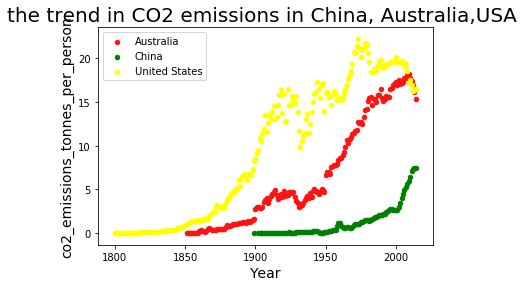

In [19]:
plt.scatter(co2["Year"],co2['Australia'],s=20, c="#ff1212", marker='o'),
plt.scatter(co2['Year'],co2['China'],s=20, c="green", marker='o'),
plt.scatter(co2['Year'],co2['United States'],s=20, c="yellow", marker='o'),
plt.legend()
plt.title("the trend in CO2 emissions in China, Australia,USA ",fontsize=20)
plt.xlabel("Year",fontsize=14)
plt.ylabel("co2_emissions_tonnes_per_person",fontsize=14)

In [20]:
#What are the maximum values for CO2 emissions (tonnes per person) for Australia, China and United States respectively?

In [21]:
#Australia
co2.Australia.max()

18.2

In [22]:
#China
co2.China.max()

7.42

In [23]:
#United States
co2['United States'].max()

22.2

In [24]:
#Fit a linear regression to the CO2 emissions in United States and plot it.
from scipy.stats import linregress
co2.fillna(0)
x = co2['Year']
y = co2['United States']
co2= co2.convert_objects(convert_numeric=True)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


Text(0,0.5,'co2_emissions_tonnes_per_person')

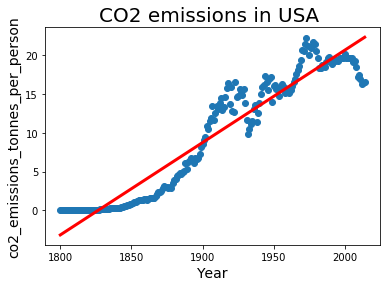

In [25]:
slope, intercept, r_value, p_value, std_err = linregress(x,y)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line',linewidth=3),
plt.title("CO2 emissions in USA ",fontsize=20)
plt.xlabel("Year",fontsize=14)
plt.ylabel("co2_emissions_tonnes_per_person",fontsize=14)

# A3

In [26]:
#Use Python to plot the Income Australia, China and United States over time.
#What was the minimum income in China recorded in the dataset and when did that occur? 
#What was the income in Australia in the same year?

In [27]:
#Use Python to plot the Income Australia, China and United States over time

In [28]:
income = pd.DataFrame(pd.read_csv('Income.csv'))
income.head()

,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1800,603,667,715,1200,618,757,1510,514,814,...,3430,2130,1760,502,585,682,861,877,663,869
1,1801,603,667,716,1200,620,757,1510,514,816,...,3440,2170,1760,502,586,682,861,879,665,870
2,1802,603,667,717,1200,623,757,1510,514,818,...,3450,2200,1760,502,586,682,861,882,667,871
3,1803,603,667,718,1200,626,757,1510,514,820,...,3340,2170,1760,502,586,682,861,884,668,872
4,1804,603,667,719,1210,628,757,1510,514,822,...,3290,2170,1760,503,586,682,861,887,670,873


Text(0,0.5,'Income')

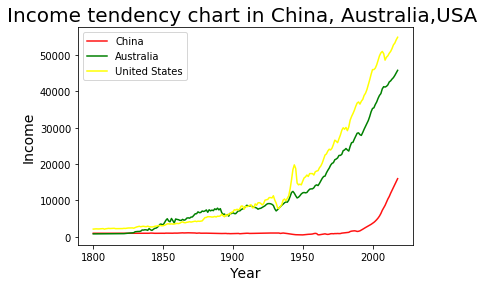

In [29]:
plt.plot(income['Year'],income['China'], c="#ff1212"),
plt.plot(income['Year'],income['Australia'], c="green"),
plt.plot(income['Year'],income['United States'], c="yellow"),
plt.legend()
plt.title("Income tendency chart in China, Australia,USA ",fontsize=20)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Income",fontsize=14)

In [30]:
#What was the minimum income in China recorded in the dataset and when did that occur? 

In [31]:
income['China'].min()

530

In [32]:
#method 1
income[income['China'].isin(['530'])]

,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
149,1949,1030,1910,3960,6870,3080,3390,8450,1730,11800,...,10900,14300,7930,1600,1280,11600,965,1330,2520,1480


In [33]:
#method 2
income[income['China']== 530].Year

149    1949
Name: Year, dtype: int64

In [34]:
#What was the income in Australia in the same year?

In [35]:
#method 1
income.loc[149,['Australia']]

Australia    11800
Name: 149, dtype: int64

In [36]:
#method 2
filter = (income.Year == 1949)
income[filter].Australia

149    11800
Name: Australia, dtype: int64

# A4

In [37]:
#1. Use Python to combine the data from the different files into a single table. The table should contain population values, income and CO2 emissions for the different years and different countries. (HINT: Pandas contains a "transpose()" method and Excel can also be used to transpose data.)
  #What is the first year and last year for the combined data?

In [38]:
income.head()

,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1800,603,667,715,1200,618,757,1510,514,814,...,3430,2130,1760,502,585,682,861,877,663,869
1,1801,603,667,716,1200,620,757,1510,514,816,...,3440,2170,1760,502,586,682,861,879,665,870
2,1802,603,667,717,1200,623,757,1510,514,818,...,3450,2200,1760,502,586,682,861,882,667,871
3,1803,603,667,718,1200,626,757,1510,514,820,...,3340,2170,1760,502,586,682,861,884,668,872
4,1804,603,667,719,1210,628,757,1510,514,822,...,3290,2170,1760,503,586,682,861,887,670,873


In [39]:
co2.head()

,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.16,0.0372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.14,0.0386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.13,0.0410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.36,0.0412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.34,0.0454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
population.head()

,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1800,3280000,410000,2500000,2650,1570000,37000,534000,413000,351000,...,12300000,6800000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
1,1801,3280000,412000,2510000,2650,1570000,37000,534000,413000,350000,...,12500000,6930000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
2,1802,3280000,413000,2520000,2650,1570000,37000,534000,413000,349000,...,12600000,7070000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
3,1803,3280000,414000,2530000,2650,1570000,37000,534000,413000,348000,...,12800000,7200000,55000,1920000,27800,718000,6550000,2590000,747000,1090000
4,1804,3280000,416000,2540000,2650,1570000,37000,534000,413000,348000,...,13000000,7340000,55000,1920000,27800,718000,6550000,2590000,747000,1090000


In [41]:
population_melt = pd.melt(population, id_vars = ['Year'],var_name='Country')
income_melt = pd.melt(income, id_vars = ['Year'],var_name='Country')
co2_melt = pd.melt(co2, id_vars = ['Year'],var_name='Country')

In [42]:
income_melt.rename(columns={'value':'Income'},inplace=True)
co2_melt.rename(columns={'value':'Co2_per_person'},inplace=True)
population_melt.rename(columns={'value':'Population'},inplace=True)

In [43]:
melt_table = pd.merge(population_melt,income_melt, on=['Year','Country'], how="outer")

In [44]:
melt_table = pd.merge(melt_table,co2_melt, on=['Year','Country'], how="outer")

In [45]:
melt_table.head()

,Year,Country,Population,Income,Co2_per_person
0,1800,Afghanistan,3280000,603.0,NaN
1,1801,Afghanistan,3280000,603.0,NaN
2,1802,Afghanistan,3280000,603.0,NaN
3,1803,Afghanistan,3280000,603.0,NaN
4,1804,Afghanistan,3280000,603.0,NaN


In [46]:
#What is the first year and last year for the combined data?
#first year:
melt_table['Year'].min()

1800

In [47]:
#last year:
melt_table['Year'].max()

2018

In [48]:
#2. Now that you have the data combined, we can see whether there is a relationship between CO2 emissions and the population. 
#Plot the values against each other.
# Can you see a relationship there?

In [49]:
melt_table['Co2_sum'] = melt_table['Population']* melt_table['Co2_per_person']

In [50]:
#get the australia, China, USA merge table which use to plot the elationship between CO2 emissions and the population in Australia, China, USA
AustraliaMerge = melt_table[(melt_table.Country == 'Australia')]
ChinaMerge = melt_table[(melt_table.Country == 'China')]
USAMerge = melt_table[(melt_table.Country == 'United States')]

In [51]:
melt_table.head()

,Year,Country,Population,Income,Co2_per_person,Co2_sum
0,1800,Afghanistan,3280000,603.0,NaN,NaN
1,1801,Afghanistan,3280000,603.0,NaN,NaN
2,1802,Afghanistan,3280000,603.0,NaN,NaN
3,1803,Afghanistan,3280000,603.0,NaN,NaN
4,1804,Afghanistan,3280000,603.0,NaN,NaN


In [52]:
average_melt_table = melt_table.groupby('Year')['Population','Co2_per_person','Income'].mean().reset_index()
average_melt_table.head()

,Year,Population,Co2_per_person,Income
0,1800,4.858439e+06,0.456096,947.782383
1,1801,4.875184e+06,0.450782,948.269430
2,1802,4.896420e+06,0.620493,951.217617
3,1803,4.921854e+06,0.495536,950.911917
4,1804,4.944249e+06,0.425787,952.772021


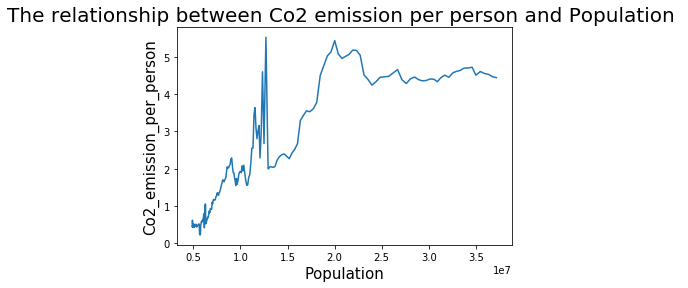

In [53]:
#2.relationship between CO2 emissions per person and the population. 
plt.plot(average_melt_table.Population,average_melt_table.Co2_per_person)
plt.title("The relationship between Co2 emission per person and Population ", fontsize = 20)
plt.xlabel("Population", fontsize = 15)
plt.ylabel("Co2_emission_per_person", fontsize = 15)
plt.show()

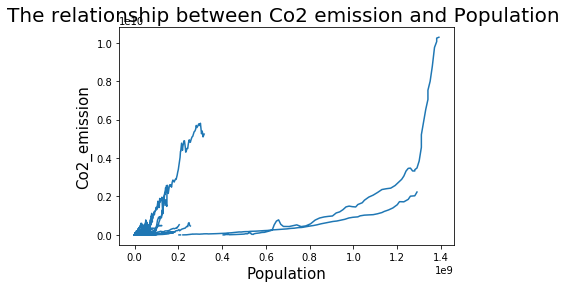

In [54]:
#2.relationship between CO2 emissions per person and the population. 
plt.plot(melt_table.Population,melt_table.Co2_sum)
plt.title("The relationship between Co2 emission and Population ", fontsize = 20)
plt.xlabel("Population", fontsize = 15)
plt.ylabel("Co2_emission", fontsize = 15)
plt.show()

Text(0,0.5,'Co2 emission')

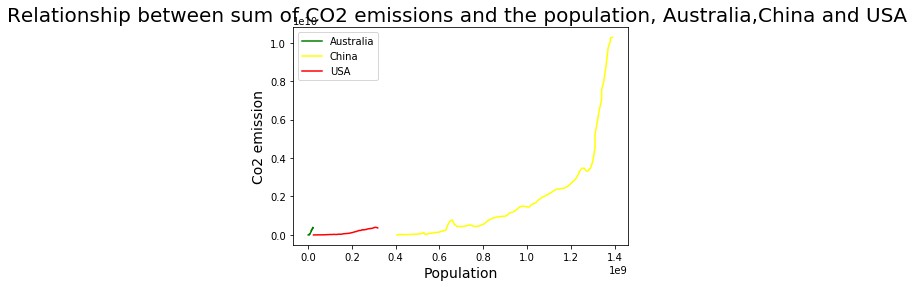

In [55]:
#3.Try selecting and plotting only the data for Australia, China and United States
plt.plot(AustraliaMerge.Population,AustraliaMerge.Co2_sum, color='green', label='Australia'),
plt.plot(ChinaMerge.Population, ChinaMerge.Co2_sum, color='yellow', label='China'),
plt.plot(USAMerge.Population, AustraliaMerge.Co2_sum, color='red', label='USA'),
plt.title("Relationship between sum of CO2 emissions and the population, Australia,China and USA ",fontsize=20)
plt.legend()
plt.xlabel("Population",fontsize=14)
plt.ylabel("Co2 emission",fontsize=14)

Text(0,0.5,'Co2 emission per person')

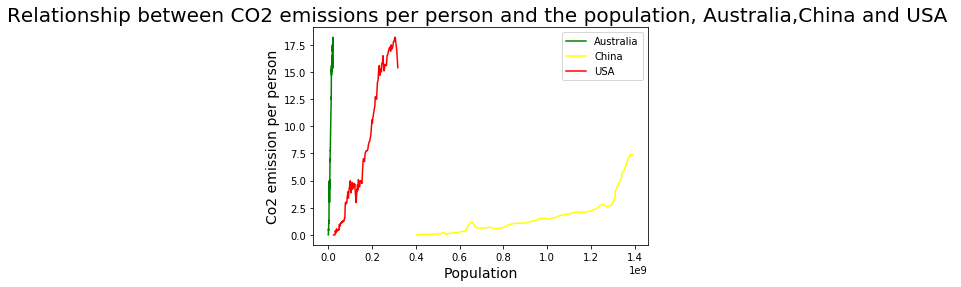

In [56]:
plt.plot(AustraliaMerge.Population,AustraliaMerge.Co2_per_person, color='green', label='Australia'),
plt.plot(ChinaMerge.Population, ChinaMerge.Co2_per_person, color='yellow', label='China'),
plt.plot(USAMerge.Population, AustraliaMerge.Co2_per_person, color='red', label='USA'),
plt.title("Relationship between CO2 emissions per person and the population, Australia,China and USA ",fontsize=20)
plt.legend()
plt.xlabel("Population",fontsize=14)
plt.ylabel("Co2 emission per person",fontsize=14)

In [57]:
#The motion chart should show the CO2 emissions on the x-axis,
#the income on the y-axis, and the bubble size should depend on the population.

In [58]:
from motionchart.motionchart import MotionChart
import pandas as pd

In [59]:
melt_table.head()

,Year,Country,Population,Income,Co2_per_person,Co2_sum
0,1800,Afghanistan,3280000,603.0,NaN,NaN
1,1801,Afghanistan,3280000,603.0,NaN,NaN
2,1802,Afghanistan,3280000,603.0,NaN,NaN
3,1803,Afghanistan,3280000,603.0,NaN,NaN
4,1804,Afghanistan,3280000,603.0,NaN,NaN


In [60]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [62]:
mChart1 = MotionChart(df = melt_table, key='Year', x='Co2_per_person', y='Income' , xscale='linear', yscale='linear',
                    size='Population',color="Country")

mChart1.to_notebook()

In [70]:
#relation between Co2_sum and Income
mChart0 = MotionChart(df = melt_table, key='Year', x='Co2_sum', y='Income' , xscale='linear', yscale='linear',
                    size='Population',color="Country")

mChart0.to_notebook()

In [63]:
melt_table.head()

,Year,Country,Population,Income,Co2_per_person,Co2_sum
0,1800,Afghanistan,3280000,603.0,NaN,NaN
1,1801,Afghanistan,3280000,603.0,NaN,NaN
2,1802,Afghanistan,3280000,603.0,NaN,NaN
3,1803,Afghanistan,3280000,603.0,NaN,NaN
4,1804,Afghanistan,3280000,603.0,NaN,NaN


Run the visualisation from start to finish. 
(Hint: In Python, to speed up the animation, set timer bar next to the play/pause button to the minimum value.) Briefly describe any pattern on the data you observed.

2.Is there generally a relationship between the amount of income and CO2 emissions in all countries during the whole period of time? What kind of relationship? Explain your answer.
    2.1 Is the CO2 emissions generally increasing or decreasing during the whole period of time? How about income? Explain your answer.
    2.2 Which country generally have the lowest CO2 emissions?
    2.3 Which country has the highest CO2 emissions during the whole period of time?
    
3. Some countries’data only start in recent years, e.g. the data for Timor-Leste only starts in year 2002. Discuss how this might affect your observations.

4. Now filter the data, use data from year 1990 to 2014 and choose only the countries Australia, China and United States. Run the motion chart again and discuss your finding.

5. Any other interesting things you notice in the data? Support your answer with relevant python code and/or motion chart.
 

2.1: Yes, it is. Co2 emission generally increasing durning whole perid of time. Simarily, Income increases in direct proportion to carbon dioxide emissions from the motion chart, I fount that most of bubbles(each country) are maintain an upword trend.

2.2.

2.3 By playing motion chart USA and China have the highest Co2 emission during the whole period time, as I play the motion chart before, I found that USA occupy the highest number of Co2 emission before approximatlly 2000, After 2000, China has surpass USA, occupying the highest number of Co2 emission.


4.This motion chart only foucs on Austalia(yellow), China(blue) and USA(grey), I could easily find that during 1990 to 2014, the income in Australia and USA increase very fast compared with China, Simarily, these three countries Income increases in direct proportion to carbon dioxide emissions. Both income and the number of co2 commision increase obviously, Australia has fast increasing in income and lower growth of Co2 emission, China maintains high growth of Co2 emission and surpass USA at around 2000, but the income with China increase not very obvious compared with USA and Australia.

5.I choose all country in the melt_table, treat population as a-xaxis, Income as y-axis to make a motion chart, and there is a potential rule that, the more population the country had the less income it will had. for example, China, India,Indonesia,USA which have the most population compare to other country, and these countries' income did not increase very fast. By comparision, other low population counties such as Austalia,Qatar,Singapore, they have higher income by the increase of year.


In [64]:
#4
countryMerge = pd.merge(ChinaMerge,USAMerge,on=['Year','Country','Income','Population','Co2_sum','Co2_per_person'],how='outer')

In [65]:
countryMerge = pd.merge(countryMerge,AustraliaMerge,on=['Year','Country','Income','Population','Co2_sum','Co2_per_person'],how='outer')

In [66]:
countryMerge.head()

,Year,Country,Population,Income,Co2_per_person,Co2_sum
0,1800,China,322000000,984.0,NaN,NaN
1,1801,China,324000000,984.0,NaN,NaN
2,1802,China,327000000,984.0,NaN,NaN
3,1803,China,330000000,984.0,NaN,NaN
4,1804,China,333000000,984.0,NaN,NaN


In [67]:
filter = (countryMerge.Year>=1990)&(countryMerge.Year<=2014)
countryMerge[filter]

,Year,Country,Population,Income,Co2_per_person,Co2_sum
190,1990,China,1170000000,1530.0,2.08,2.433600e+09
191,1991,China,1190000000,1650.0,2.16,2.570400e+09
192,1992,China,1200000000,1860.0,2.23,2.676000e+09
193,1993,China,1220000000,2090.0,2.37,2.891400e+09
194,1994,China,1230000000,2340.0,2.49,3.062700e+09
195,1995,China,1240000000,2560.0,2.68,3.323200e+09
196,1996,China,1250000000,2790.0,2.77,3.462500e+09
197,1997,China,1260000000,3020.0,2.76,3.477600e+09
198,1998,China,1270000000,3220.0,2.62,3.327400e+09
199,1999,China,1280000000,3440.0,2.60,3.328000e+09


In [69]:
mChart2 = MotionChart(df = countryMerge, key='Year', x='Co2_sum', y='Income' , xscale='linear', yscale='linear',
                    size='Population',color="Country")

mChart2.to_notebook()

In [71]:
#5
mChart3 = MotionChart(df = melt_table, key='Year', x='Population', y='Income' , xscale='linear', yscale='linear',
                    )

mChart3.to_notebook()